In [1]:
import locale
# This hack is to prevent occasional issue in Colab https://github.com/googlecolab/colabtools/issues/3409
locale.getpreferredencoding = lambda *args: "UTF-8"

!pip install -qq super-gradients==3.6.0
!pip install -qq tensorrt~=8.6 pycuda pytorch-quantization==2.1.2 --extra-index-url https://pypi.ngc.nvidia.com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to 

In [2]:
import pycuda.driver as cuda
import pycuda.autoinit
import tensorrt as trt

print(trt.__version__)

trt_logger = trt.Logger(trt.Logger.VERBOSE)

device = cuda.Device(0)
device.compute_capability()

8.6.1


(7, 5)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import super_gradients
import os
from super_gradients.common.object_names import Models
from super_gradients.training import models
from super_gradients.conversion.conversion_enums import ExportTargetBackend, ExportQuantizationMode, DetectionOutputFormatMode

yolonas = models.get(Models.YOLO_NAS_M,
                        num_classes=80,
                        checkpoint_path=os.path.join('/content/drive/MyDrive/Weed detection.v4i.yolov5pytorch/yolov5/runs/train','yolonas_m_transfer_v3', 'ckpt_best.pth'))
yolonas.export("yolonas_m.onnx", preprocessing=True, postprocessing=True, engine=ExportTargetBackend.TENSORRT)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

Collecting onnx_graphsurgeon==0.3.27

Downloading https://developer.download.nvidia.com/compute/redist/onnx-graphsurgeon/onnx_graphsurgeon-0.3.27-py2.py3-none-any.whl (42 kB)

Output()

Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from onnx_graphsurgeon==0.3.27) (1.23.0)

Requirement already satisfied: onnx in /usr/local/lib/python3.10/dist-packages (from onnx_graphsurgeon==0.3.27) (1.13.0)

Requirement already satisfied: protobuf<4,>=3.20.2 in /usr/local/lib/python3.10/dist-packages (from onnx->onnx_graphsurgeon==0.3.27) (3.20.3)

Requirement already satisfied: typing-extensions>=3.6.2.1 in /usr/local/lib/python3.10/dist-packages (from onnx->onnx_graphsurgeon==0.3.27) (4.9.0)

Installing collected packages: onnx_graphsurgeon

Successfully installed onnx_graphsurgeon-0.3.27

Created NMS plugin 'EfficientNMS_TRT' with attributes: {'plugin_version': '1', 'background_class': -1, 'max_output_boxes': 1000, 'score_threshold': 0.5, 'iou_threshold': 0.65, 'score_activation': False, 'box_coding': 0}

Model exported successfully to yolonas_m.onnx
Model expects input image of shape [1, 3, 640, 640]
Input image dtype is torch.uint8
Exported model already contains preprocessing (normalization) step, so you don't need to do it manually.
Preprocessing steps to be applied to input image are:
Sequential(
  (0): CastTensorTo(dtype=torch.float32)
  (1): ChannelSelect(channels_indexes=tensor([2, 1, 0]))
)

Exported model contains postprocessing (NMS) step with the following parameters:
    num_pre_nms_predictions=1000
    max_predictions_per_image=1000
    nms_threshold=0.65
    confidence_threshold=0.5
    output_predictions_format=batch

Exported model is in ONNX format and can be used with TensorRT
To run inference with TensorRT, please see TensorRT deployment documentation
You can benchmark the model using the following code snippet:

    trtexec --onnx=yolonas_m.onnx --fp16 --avgRuns=100 --duration=15

Exported model has predictions in batch format:

    num_detections, pred_boxes, pred_

In [6]:
from typing import List, Tuple
import tensorrt as trt


def convert_onnx_to_trt_engine(onnx_file, trt_output_file, enable_int8_quantization:bool = False):
  EXPLICIT_BATCH = 1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)

  with trt.Builder(trt_logger) as builder, builder.create_network(EXPLICIT_BATCH) as network, builder.create_builder_config() as config:

    config = builder.create_builder_config()
    config.profiling_verbosity = trt.ProfilingVerbosity.DETAILED

    if enable_int8_quantization:
      config.set_flag(trt.BuilderFlag.INT8)
    else:
      config.set_flag(trt.BuilderFlag.FP16)

    config.set_memory_pool_limit(trt.MemoryPoolType.WORKSPACE, 1 << 30)

    # Load your ONNX model
    with trt.OnnxParser(network, trt_logger) as onnx_parser:
      with open(onnx_file, 'rb') as f:
        parse_success = onnx_parser.parse(f.read())
        if not parse_success:
          errors = "\n".join(
              [str(onnx_parser.get_error(error)) for error in range(onnx_parser.num_errors)]
          )
          raise RuntimeError(f"Failed to parse onnx model for trt conversion. Errors: \n{errors}")

      trt_logger.log(trt.ILogger.INFO, "Parsed ONNX model")

    # Query input names and shapes from parsed TensorRT network
    network_inputs = [network.get_input(i) for i in range(network.num_inputs)]
    input_names = [_input.name for _input in network_inputs]  # ex: ["actual_input1"]

    assert input_names[0] == 'input'

    serialized_engine = builder.build_serialized_network(network, config)
    with open(trt_output_file, "wb") as output_file:
      output_file.write(serialized_engine)
      trt_logger.log(trt.ILogger.INFO, "Serialization done")

convert_onnx_to_trt_engine("yolonas_m.onnx", "yolonas_m.trt")

In [7]:
import os


class HostDeviceMem(object):
    def __init__(self, host_mem, device_mem):
        self.host = host_mem
        self.device = device_mem

    def __str__(self):
        return "Host:\n" + str(self.host) + "\nDevice:\n" + str(self.device)

    def __repr__(self):
        return self.__str__()


def allocate_buffers(engine):
    inputs = []
    outputs = []
    bindings = []
    stream = cuda.Stream()
    for binding in engine:
        size = trt.volume(engine.get_binding_shape(binding)[1:]) * engine.max_batch_size
        dtype = trt.nptype(engine.get_binding_dtype(binding))
        binding_index = engine.get_binding_index(binding)

        # Allocate host and device buffers
        host_mem = cuda.pagelocked_empty(size, dtype)
        # Only bytes, no need for size
        device_mem = cuda.mem_alloc(host_mem.nbytes)

        # Append the device buffer to device bindings.
        bindings.append(int(device_mem))

        # Append to the appropriate list.
        if engine.binding_is_input(binding):
            inputs.append(HostDeviceMem(host_mem, device_mem))
        else:
            outputs.append(HostDeviceMem(host_mem, device_mem))
    return inputs, outputs, bindings, stream

def load_engine(engine_file_path):
  assert os.path.exists(engine_file_path)
  print("Reading engine from file {}".format(engine_file_path))
  with open(engine_file_path, "rb") as f, trt.Runtime(trt_logger) as runtime:
    serialized_engine = f.read()
    engine = runtime.deserialize_cuda_engine(serialized_engine)
    return engine


In [8]:
import cv2
import numpy as np


class InferenceSession:
  def __init__(self, engine_file, inference_shape: Tuple[int,int]):
    self.engine = load_engine(engine_file)
    self.context = None
    self.inference_shape = inference_shape

  def __enter__(self):
      self.context = self.engine.create_execution_context()
      assert self.context

      self.context.set_input_shape('input', (1, 3, *self.inference_shape))
      self.inputs, self.outputs, self.bindings, self.stream = allocate_buffers(self.engine)

      return self

  def preprocess(self, image):
      image = np.array(image)
      rows, cols = self.inference_shape
      original_shape = image.shape[:2]
      # Resize image to fixed size
      image = cv2.resize(np.array(image), dsize=(cols, rows))
      # Switch from HWC to to CHW order
      return np.moveaxis(image, 2, 0), original_shape

  def postprocess(self, detected_boxes, original_shape: Tuple[int, int]):
      sx = original_shape[1] / self.inference_shape[1]
      sy = original_shape[0] / self.inference_shape[0]
      detected_boxes[:, :, [0, 2]] *= sx
      detected_boxes[:, :, [1, 3]] *= sy
      return detected_boxes

  def __call__(self, image):
      batch_size = 1
      input_image, original_shape = self.preprocess(image)

      self.inputs[0].host[:np.prod(input_image.shape)] = np.asarray(input_image).ravel()

      [cuda.memcpy_htod(inp.device, inp.host) for inp in self.inputs]
      success = self.context.execute_v2(bindings=self.bindings)
      assert success
      [cuda.memcpy_dtoh(out.host, out.device) for out in self.outputs]

      num_detections, detected_boxes, detected_scores, detected_labels = [o.host for o in self.outputs]

      num_detections = num_detections.reshape(-1)
      num_predictions_per_image = len(detected_scores) // batch_size
      detected_boxes  = detected_boxes.reshape(batch_size, num_predictions_per_image, 4)
      detected_scores = detected_scores.reshape(batch_size, num_predictions_per_image)
      detected_labels = detected_labels.reshape(batch_size, num_predictions_per_image)

      detected_boxes = self.postprocess(detected_boxes, original_shape) # Scale coordinates back to original image shape
      return num_detections, detected_boxes, detected_scores, detected_labels


  def __exit__(self, exc_type, exc_val, exc_tb):
    del self.inputs, self.outputs, self.bindings, self.stream, self.context


In [9]:
from super_gradients.training.utils.detection_utils import DetectionVisualization
from super_gradients.training.datasets.datasets_conf import COCO_DETECTION_CLASSES_LIST
from super_gradients.training.utils.media.image import load_pil_image_from_str

image = load_pil_image_from_str("/content/IMG20230217105428_jpg.rf.2686015b4a3280c6758194807f58a69d.jpg")

with InferenceSession("yolonas_m.trt", (640, 640)) as session:
  result = session(image)

# Show first 10 boxes
result[1][0, :10]

array([[ 2.707500e+02,  9.600000e+01,  3.765000e+02,  1.965000e+02],
       [ 4.140000e+02,  4.562500e+02,  4.550000e+02,  4.900000e+02],
       [ 4.380000e+02,  4.137500e+01,  5.780000e+02,  2.612500e+02],
       [ 4.477500e+02,  1.054375e+02,  5.740000e+02,  2.460000e+02],
       [ 5.653125e+01,  3.075000e+02,  1.182500e+02,  3.810000e+02],
       [ 3.847500e+02,  1.537500e+02,  5.057500e+02,  2.612500e+02],
       [ 5.660000e+02,  3.870000e+02,  6.040000e+02,  4.337500e+02],
       [-5.625000e-01,  5.685000e+02,  8.537500e+01,  6.400000e+02],
       [ 2.422500e+02,  4.310000e+02,  3.252500e+02,  5.345000e+02],
       [ 2.093750e+02,  4.660000e+02,  2.420000e+02,  5.037500e+02]],
      dtype=float32)

Reading engine from file yolonas_m.trt


<ipython-input-7-56244ad65111>:22: DeprecationWarning: Use get_tensor_shape instead.
  size = trt.volume(engine.get_binding_shape(binding)[1:]) * engine.max_batch_size
<ipython-input-7-56244ad65111>:22: DeprecationWarning: Use network created with NetworkDefinitionCreationFlag::EXPLICIT_BATCH flag instead.
  size = trt.volume(engine.get_binding_shape(binding)[1:]) * engine.max_batch_size
<ipython-input-7-56244ad65111>:23: DeprecationWarning: Use get_tensor_dtype instead.
  dtype = trt.nptype(engine.get_binding_dtype(binding))
<ipython-input-7-56244ad65111>:24: DeprecationWarning: Use get_tensor_name instead.
  binding_index = engine.get_binding_index(binding)
<ipython-input-7-56244ad65111>:35: DeprecationWarning: Use get_tensor_mode instead.
  if engine.binding_is_input(binding):


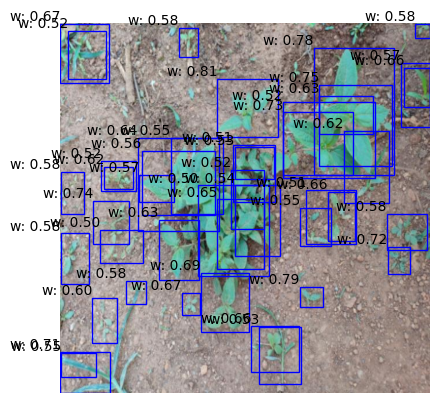

In [52]:
#the following code mislabels the class as 'person' rather than 'weeds', and the error is not solvable by me currently. Hence i remove the class names
#this is not the problem of model, but of the way tensorRT and OpenCV modules are used in this notebook

# Inference done with tensorRT ( better than normal yolo pytorch inference)

import matplotlib.pyplot as plt
from super_gradients.inference import iterate_over_detection_predictions_in_batched_format

def show_predictions_from_batch_format(image, predictions):
    image_index, pred_boxes, pred_scores, pred_classes = next(iter(iterate_over_detection_predictions_in_batched_format(predictions)))

    predicted_boxes = np.concatenate([pred_boxes, pred_scores[:, np.newaxis], pred_classes[:, np.newaxis]], axis=1)

    image_np = np.array(image)

    if pred_boxes is not None:
        for box, score, _ in zip(pred_boxes, pred_scores, pred_classes):
            xmin, ymin, xmax, ymax = box
            # Draw bounding box
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='blue', linewidth=1))
            # Add annotation (class label)
            plt.annotate(f'w: {score:.2f}', xy=(xmin, ymin), xytext=(xmin, ymin), fontsize=10, ha='right', va='bottom', color='black')


    plt.imshow(image_np)
    plt.axis('off')  # Turn off axis
    plt.show()

show_predictions_from_batch_format(image, result)

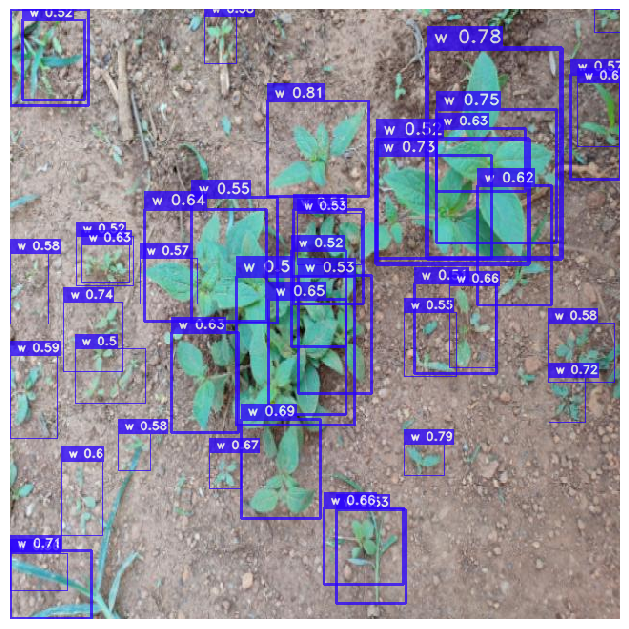

In [18]:
# inference done normally, without tensorRT
yolonas.predict(image, fuse_model=False).show()

In [ ]:
#work is done till here. For all intents and purposes all my project work is finished now, only testing on Jetson Nano is left
#execute the following code next time

yolonas.export("yolonas_m_int8.onnx", preprocessing=True, postprocessing=True, engine=ExportTargetBackend.TENSORRT, quantization_mode=ExportQuantizationMode.INT8)
convert_onnx_to_trt_engine("yolonas_m_int8.onnx", "yolonas_m_int8.trt", enable_int8_quantization=True)

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConvTranspose2d with axis None!

Weight is fake quantized to 8 bits in QuantConvTranspose2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConvTranspose2d with axis None!

Weight is fake quantized to 8 bits in QuantConvTranspose2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

Input is fake quantized to 8 bits in QuantConv2d with axis None!

Weight is fake quantized to 8 bits in QuantConv2d with axis 0!

Creating histogram calibrator

Creating Max calibrator

WARNING: Use Pytorch's native experimental fake quantization.


/usr/local/lib/python3.10/dist-packages/pytorch_quantization/nn/modules/tensor_quantizer.py:284: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if amax.numel() == 1:
/usr/local/lib/python3.10/dist-packages/pytorch_quantization/nn/modules/tensor_quantizer.py:286: TracerWarning: Converting a tensor to a Python number might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  inputs, amax.item() / bound, 0,
/usr/local/lib/python3.10/dist-packages/pytorch_quantization/utils/reduce_amax.py:61: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python

In [ ]:
with InferenceSession("yolonas_m_int8.trt", (640, 640)) as session:
  result_int8 = session(image)

show_predictions_from_batch_format(image, result_int8)

In [ ]:
import cv2
num_iterations = 1000

yolonas_pipeline = yolonas.cuda()._get_pipeline(fuse_model=False)

# Run inference using PyTorch engine
start = cv2.getTickCount()
for _ in range(num_iterations):
  yolonas_pipeline(image)
finish = cv2.getTickCount()
pytorch_throughput = cv2.getTickFrequency() * num_iterations / (finish - start)


# Run inference using TensorRT engine
start = cv2.getTickCount()
with InferenceSession("yolonas_m.trt", (640, 640)) as session:
  for _ in range(num_iterations):
    session(image)
finish = cv2.getTickCount()
trt_fp16_throughput = cv2.getTickFrequency() * num_iterations / (finish - start)


# Run inference using TensorRT engine and INT8 quantized model
start = cv2.getTickCount()
with InferenceSession("yolonas_m_int8.trt", (640, 640)) as session:
  for _ in range(num_iterations):
    session(image)
finish = cv2.getTickCount()
trt_int8_throughput = cv2.getTickFrequency() * num_iterations / (finish - start)


pytorch_throughput, trt_fp16_throughput, trt_int8_throughput

In [ ]:
import matplotlib.pyplot as plt

# Bar names and their corresponding inference latencies in milliseconds
bar_names = ["PyTorch", "TensorRT FP16", "TensorRT INT8"]
latencies_ms = [67.16, 9.88, 9.54]  # Inference latencies in ms

# Calculating Frames Per Second (FPS) from latencies
fps_values = [pytorch_throughput, trt_fp16_throughput, trt_int8_throughput]

# Colors for each bar
colors = ['blue', 'green', 'limegreen']

# Creating the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(bar_names, fps_values, color=colors)

# Adding the FPS values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Removing the grid
plt.grid(False)

# Adding title
plt.title("YoloNAS Inference Performance Comparison")

# Show the plot
plt.show()